# setting

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import os

# Hàm

In [4]:
def find_best_k_for_knn(file_pairs, base_path, max_k=30):
    for train_file, test_file in file_pairs:
        print(f"Đang xử lý: {train_file} và {test_file}")
        train_path = os.path.join(base_path, train_file)
        test_path = os.path.join(base_path, test_file)
        df_train = pd.read_csv(train_path)
        df_test = pd.read_csv(test_path)

        X_train = df_train.drop(columns=['Index', 'id', "satisfaction_satisfied"], errors='ignore')
        y_train = df_train['satisfaction_satisfied']
        X_test = df_test.drop(columns=['Index', 'id', "satisfaction_satisfied"], errors='ignore')
        y_test = df_test['satisfaction_satisfied']

        k_range = range(1, max_k + 1)
        accuracies = []

        for k in k_range:
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            accuracies.append(acc)

        plt.figure(figsize=(10, 5))
        plt.plot(k_range, accuracies, marker='o')
        plt.title(f"Biểu đồ độ chính xác theo k ({train_file})")
        plt.xlabel("Giá trị k")
        plt.ylabel("Độ chính xác")
        plt.grid(True)
        plt.xticks(k_range)
        plt.show()

        # In k tốt nhất
        best_k = k_range[accuracies.index(max(accuracies))]
        print(f"k tốt nhất cho {train_file} là: {best_k}, accuracy = {max(accuracies):.4f}")

In [5]:
def evaluate_knn_model(file_pairs, base_path, k):
    i = 0
    for train_file, test_file in file_pairs:
        print(f"\n----- ĐÁNH GIÁ MÔ HÌNH VỚI BỘ {train_file[:-4]} - {test_file[:-4]} - k = {k[i]}-----")

        df_train = pd.read_csv(f"{base_path}/{train_file}")
        df_test = pd.read_csv(f"{base_path}/{test_file}")

        X_train = df_train.drop(columns=['Index', 'id', 'satisfaction_satisfied'], errors='ignore')
        y_train = df_train['satisfaction_satisfied']

        X_test = df_test.drop(columns=['Index', 'id', 'satisfaction_satisfied'], errors='ignore')
        y_test = df_test['satisfaction_satisfied']

        model = KNeighborsClassifier(n_neighbors=k[i])
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred, digits=4))
        
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("\nMa trận nhầm lẫn:")
        print(conf_matrix)
        i += 1

# Kiểm tra k tối ưu độ chính xác

## Original

Đang xử lý: train41.csv và test41.csv


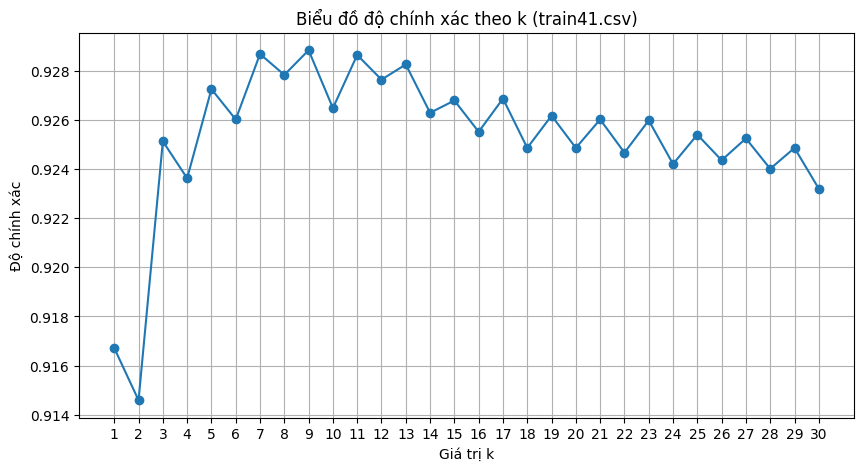

k tốt nhất cho train41.csv là: 9, accuracy = 0.9288
Đang xử lý: train64.csv và test64.csv


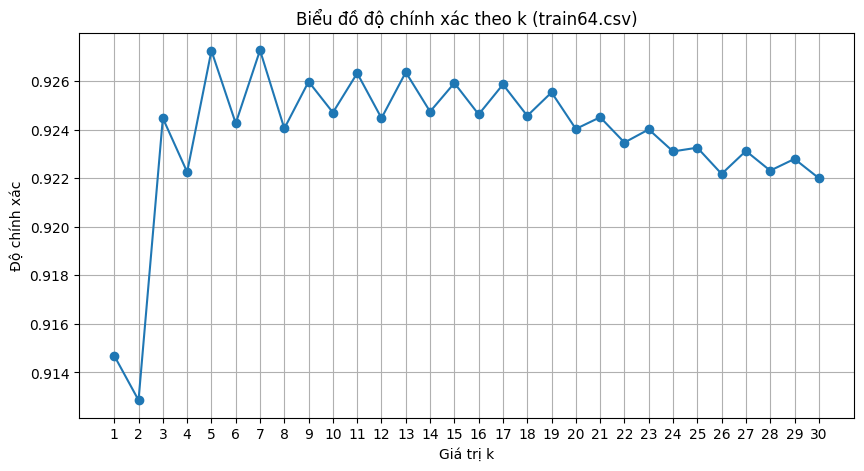

k tốt nhất cho train64.csv là: 7, accuracy = 0.9273
Đang xử lý: train73.csv và test73.csv


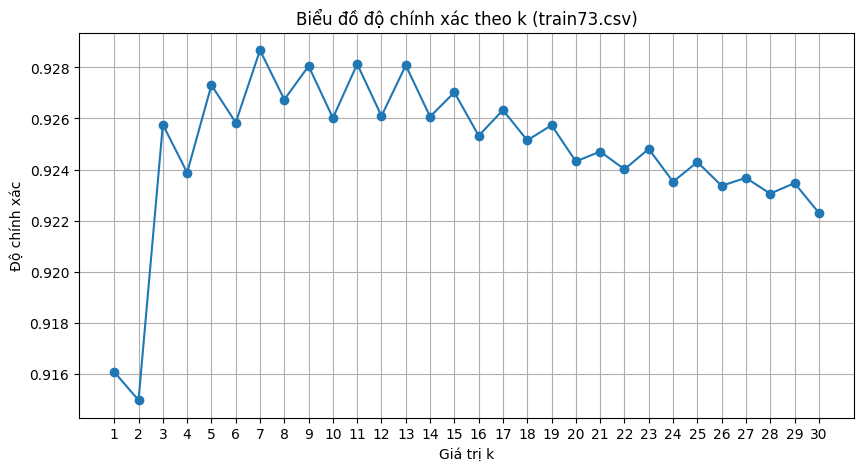

k tốt nhất cho train73.csv là: 7, accuracy = 0.9287


In [11]:
file_pairs = [
    ("train41.csv", "test41.csv"),
    ("train64.csv", "test64.csv"),
    ("train73.csv", "test73.csv")
]

base_path = "D:\9. ky2nam3\ML\Project_ML\data\original_data"
find_best_k_for_knn(file_pairs, base_path)


# Test

## Original

In [7]:
file_pairs = [
    ("train41.csv", "test41.csv"),
    ("train64.csv", "test64.csv"),
    ("train73.csv", "test73.csv")
]
base_path = "D:\9. ky2nam3\ML\Project_ML\data\original_data"

evaluate_knn_model(file_pairs, base_path, k = [9, 7, 7])



----- ĐÁNH GIÁ MÔ HÌNH VỚI BỘ train41 - test41 - k = 9-----
              precision    recall  f1-score   support

           0     0.9178    0.9604    0.9386     14668
           1     0.9449    0.8876    0.9154     11230

    accuracy                         0.9288     25898
   macro avg     0.9314    0.9240    0.9270     25898
weighted avg     0.9295    0.9288    0.9285     25898


Ma trận nhầm lẫn:
[[14087   581]
 [ 1262  9968]]

----- ĐÁNH GIÁ MÔ HÌNH VỚI BỘ train64 - test64 - k = 7-----
              precision    recall  f1-score   support

           0     0.9173    0.9580    0.9372     29354
           1     0.9417    0.8871    0.9136     22441

    accuracy                         0.9273     51795
   macro avg     0.9295    0.9225    0.9254     51795
weighted avg     0.9279    0.9273    0.9270     51795


Ma trận nhầm lẫn:
[[28121  1233]
 [ 2534 19907]]

----- ĐÁNH GIÁ MÔ HÌNH VỚI BỘ train73 - test73 - k = 7-----
              precision    recall  f1-score   support

        

## PCA

In [7]:
file_pairs = [
    ("train_pca_41.csv", "test_pca_41.csv"),
    ("train_pca_64.csv", "test_pca_64.csv"),
    ("train_pca_73.csv", "test_pca_73.csv")
]
base_path = "D:\9. ky2nam3\ML\Project_ML\data\PCA_data"

evaluate_knn_model(file_pairs, base_path, k=[10, 10, 10])


----- ĐÁNH GIÁ MÔ HÌNH VỚI BỘ train_pca_41 - test_pca_41 - k = 10-----
              precision    recall  f1-score   support

           0     0.8522    0.9192    0.8845     14668
           1     0.8824    0.7918    0.8347     11230

    accuracy                         0.8640     25898
   macro avg     0.8673    0.8555    0.8596     25898
weighted avg     0.8653    0.8640    0.8629     25898


Ma trận nhầm lẫn:
[[13483  1185]
 [ 2338  8892]]

----- ĐÁNH GIÁ MÔ HÌNH VỚI BỘ train_pca_64 - test_pca_64 - k = 10-----
              precision    recall  f1-score   support

           0     0.8486    0.9189    0.8824     29354
           1     0.8810    0.7855    0.8305     22441

    accuracy                         0.8611     51795
   macro avg     0.8648    0.8522    0.8565     51795
weighted avg     0.8627    0.8611    0.8599     51795


Ma trận nhầm lẫn:
[[26974  2380]
 [ 4813 17628]]

----- ĐÁNH GIÁ MÔ HÌNH VỚI BỘ train_pca_73 - test_pca_73 - k = 10-----
              precision    rec

## LDA

In [8]:
file_pairs = [
    ("train_lda_41.csv", "test_lda_41.csv"),
    ("train_lda_64.csv", "test_lda_64.csv"),
    ("train_lda_73.csv", "test_lda_73.csv")
]
base_path = "D:\9. ky2nam3\ML\Project_ML\data\LDA_data"

evaluate_knn_model(file_pairs, base_path, k = [9, 7, 7])


----- ĐÁNH GIÁ MÔ HÌNH VỚI BỘ train_lda_41 - test_lda_41 - k = 9-----
              precision    recall  f1-score   support

           0     0.8619    0.9081    0.8844     14668
           1     0.8709    0.8100    0.8393     11230

    accuracy                         0.8655     25898
   macro avg     0.8664    0.8590    0.8619     25898
weighted avg     0.8658    0.8655    0.8649     25898


Ma trận nhầm lẫn:
[[13320  1348]
 [ 2134  9096]]

----- ĐÁNH GIÁ MÔ HÌNH VỚI BỘ train_lda_64 - test_lda_64 - k = 7-----
              precision    recall  f1-score   support

           0     0.8585    0.9056    0.8814     29354
           1     0.8669    0.8048    0.8347     22441

    accuracy                         0.8619     51795
   macro avg     0.8627    0.8552    0.8581     51795
weighted avg     0.8622    0.8619    0.8612     51795


Ma trận nhầm lẫn:
[[26582  2772]
 [ 4381 18060]]

----- ĐÁNH GIÁ MÔ HÌNH VỚI BỘ train_lda_73 - test_lda_73 - k = 7-----
              precision    recall